In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
birddata = pd.read_csv('bird_tracking.csv')

In [13]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [14]:

birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [15]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [16]:
ix = birddata.bird_name == 'Eric'

In [17]:
x, y, = birddata.longitude[ix], birddata.latitude[ix]

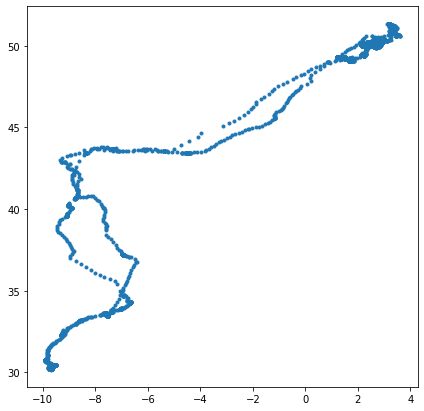

In [18]:
plt.figure(figsize = (7,7))
plt.plot(x, y, '.')
plt.show()

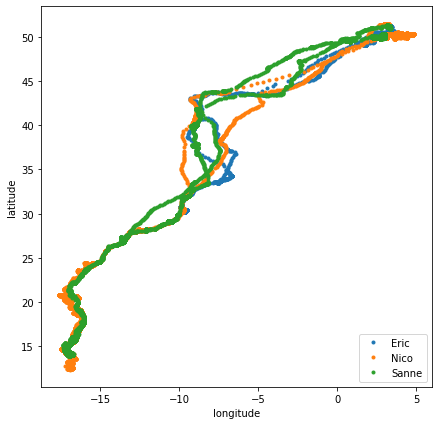

In [19]:
plt.figure(figsize = (7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y, = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x, y, '.', label = bird_name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(loc = 'lower right')
plt.savefig('birds_info.pdf')
plt.show()

In [20]:
import datetime

In [21]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [22]:
data = birddata[birddata.bird_name == 'Eric']
data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
19790,19790,12,2014-04-30 21:51:26+00,851,120.619823,51.322966,3.216576,0.064031,Eric,2014-04-30 21:51:26
19791,19791,34,2014-04-30 22:21:33+00,851,35.683036,51.323116,3.216659,1.942395,Eric,2014-04-30 22:21:33
19792,19792,1,2014-04-30 22:51:41+00,851,-52.808233,51.322979,3.216463,1.678392,Eric,2014-04-30 22:51:41
19793,19793,7,2014-04-30 23:21:34+00,851,-38.675683,51.322986,3.216340,0.208087,Eric,2014-04-30 23:21:34


In [23]:
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time)/ datetime.timedelta (days = 1)
elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

In [24]:
next_day = 1
inds = []
daily_mean_speed = []
#tuple of index and time
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
print('the days are: ', len(daily_mean_speed))
print('the speed per day is:', daily_mean_speed)

the days are:  258
the speed per day is: [2.121516513619244, 2.6191052366952796, 1.7863149983905395, 2.945423589385866, 2.4762427460803886, 1.8477070902332324, 2.560404356375535, 1.482814303345286, 1.6162885950348576, 1.5220367121305791, 2.028393720085181, 1.7402841957023534, 1.5411246572674582, 2.110516034907192, 2.0219116434979787, 2.689771361985732, 2.351241357863497, 2.659076347659485, 2.9416171622419505, 1.8984097647885263, 2.3327509804317934, 1.6072552805767766, 1.7682757593059097, 2.9943046312787565, 1.9085264007103804, 1.3634392809056228, 2.02224772742323, 2.72254039303825, 2.269189387498984, 2.0142790500748506, 2.822659710423693, 2.004075379375076, 1.7669075779904866, 1.9567174870023374, 1.6085815765274403, 2.1039007148615307, 2.0923230222020206, 2.0779645085088836, 1.7590805790548523, 2.5642674569001462, 2.0224097745761993, 2.5242849164664367, 2.33621733355763, 2.1500196892882166, 1.6971102860729534, 3.175848894110063, 2.3345096275728086, 2.440327594446141, 1.8545408525983385

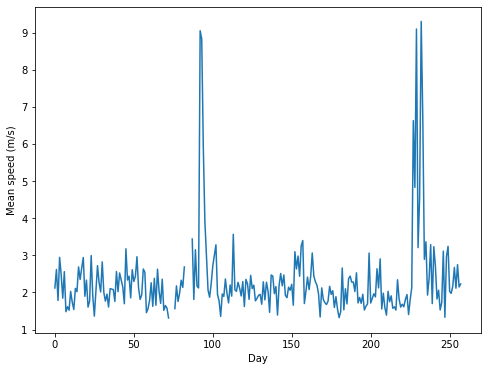

In [26]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Mean speed (m/s)')
plt.savefig('dms.pdf')
plt.show()

In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

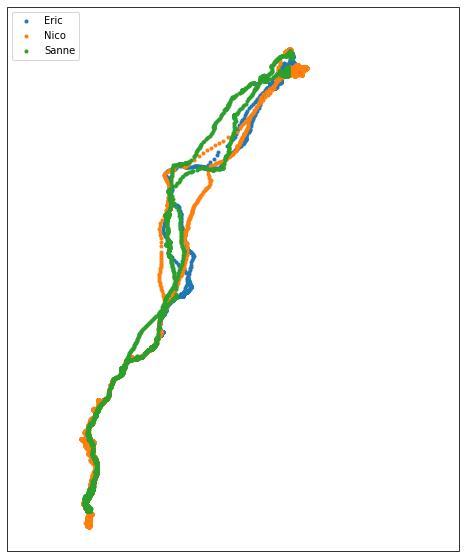

In [30]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.savefig('map.pdf')
plt.show()

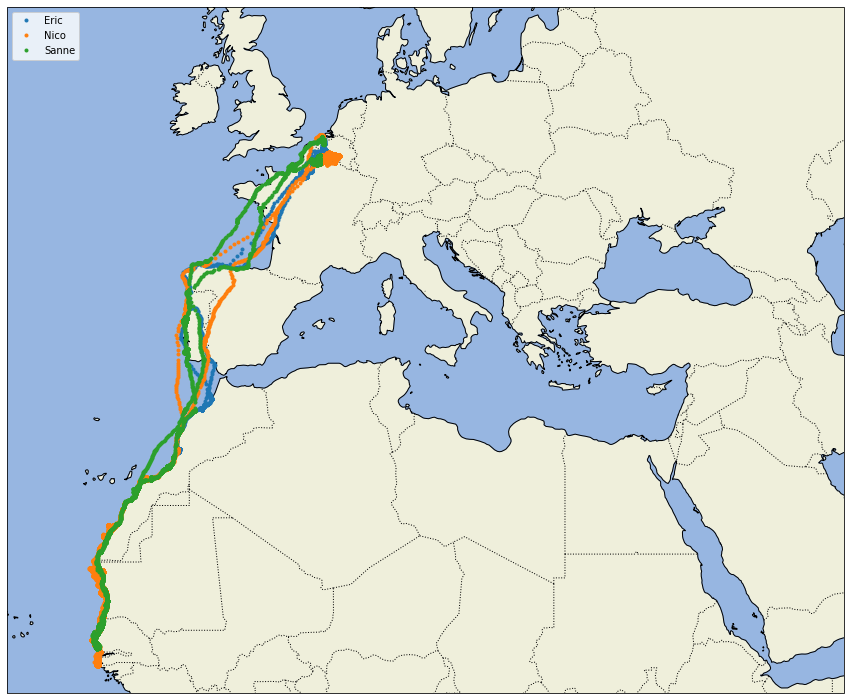

In [45]:
proj = ccrs.Mercator()
plt.figure(figsize=(15,15))
ax = plt.axes(projection = proj)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')
ax.set_extent((-25.0, 50.0, 52.0, 10.0))


for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.savefig('map_2.pdf')
plt.show()

In [46]:
grouped_birds = birddata.groupby("bird_name")

mean_speeds = grouped_birds.speed_2d.mean()
mean_altitudes = grouped_birds.altitude.mean()

In [47]:
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

In [48]:
mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

In [53]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

grouped_bydates = birddata.groupby("date")
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [57]:
mean_altitudes_perday[:20]

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
2013-08-20    184.461224
2013-08-21    171.546185
2013-08-22    114.172691
2013-08-23    144.716049
2013-08-24    101.446721
2013-08-25     93.162602
2013-08-26     75.995951
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
Name: altitude, dtype: float64

In [81]:
grouped_birdday = birddata.groupby(["bird_name", 'date'])

mean_altitudes_perday = grouped_birdday.altitude.mean()

# look at the head of `mean_altitudes_perday`.
mean_altitudes_perday

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
                            ...    
Sanne      2014-04-26     17.116667
           2014-04-27     17.391892
           2014-04-28     58.876712
           2014-04-29     30.530120
           2014-04-30      4.361111
Name: altitude, Length: 770, dtype: float64

In [62]:
mean_speeds = grouped_birdday.speed_2d.mean()
mean_speeds

bird_name  date      
Eric       2013-08-15    2.121517
           2013-08-16    2.618113
           2013-08-17    1.765809
           2013-08-18    2.951171
           2013-08-19    2.435545
                           ...   
Sanne      2014-04-26    1.056218
           2014-04-27    2.439322
           2014-04-28    3.344398
           2014-04-29    2.220966
           2014-04-30    1.814705
Name: speed_2d, Length: 770, dtype: float64

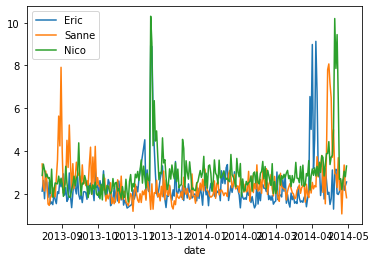

In [52]:
eric_daily_speed  = grouped_birdday.speed_2d.mean()['Eric']
sanne_daily_speed = grouped_birdday.speed_2d.mean()['Sanne']
nico_daily_speed  = grouped_birdday.speed_2d.mean()['Nico']

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [94]:
nico_daily_speed

date
2013-08-15    2.856924
2013-08-16    3.386387
2013-08-17    3.123210
2013-08-18    2.785776
2013-08-19    2.920577
                ...   
2014-04-26    2.192028
2014-04-27    2.582072
2014-04-28    3.055051
2014-04-29    2.793232
2014-04-30    3.297032
Name: speed_2d, Length: 259, dtype: float64